# USO LIBRERÍA ARCGIS

DATOS mundiales extraidos de: https://www.efrainmaps.es/english-version/free-downloads/world/

<img src= attachment:logo.png width = 50/> 

#### Objetivo

Una aproximación al workflow con el Api de ArcGIS en local con jupyter notebooks  

- Se trabja con pandas
- Se usan datos en local
- Luego se pintan en un mapa
- Finalmente se intenta exportar y publicar el mapa en arcgis Online

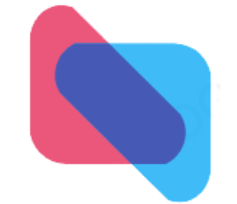

In [2]:
from arcgis.gis import GIS
gis = GIS("https://esrimastergis.maps.arcgis.com/","abatlle.esrimg")

Enter password: ········


In [3]:
import pandas as pd

In [6]:
hist = pd.read_csv('C:\EsriTraining\LearnArcGIS\RiverFloods\RiverFloods\global_flood_risk.csv')   

In [7]:
hist

,Rank,Country,Current annual average population affected by river floods
0,1,India,"4,835,259"
1,2,Bangladesh,"3,477,315"
2,3,China,"3,279,455"
3,4,Vietnam,"929,635"
4,5,Pakistan,"714,822"
...,...,...,...
158,159,Jamaica,52
159,160,Djibouti,49
160,161,Cyprus,42
161,162,Iceland,23


In [10]:
datos = pd.DataFrame(hist)
datos

,Rank,Country,Current annual average population affected by river floods
0,1,India,"4,835,259"
1,2,Bangladesh,"3,477,315"
2,3,China,"3,279,455"
3,4,Vietnam,"929,635"
4,5,Pakistan,"714,822"
...,...,...,...
158,159,Jamaica,52
159,160,Djibouti,49
160,161,Cyprus,42
161,162,Iceland,23


In [13]:
mapa = gis.map()
mapa

MapView(layout=Layout(height='400px', width='100%'))

In [24]:
dbfpaisos = pd.read_csv("C:\IndieProjects\DatosMundo\World_Countries\World_Countries.dbf")
dbfpaisos

,r �
0,r �
1,Aruba (Netherlands) ...


In [25]:
capaPaisos = pd.DataFrame(dbfpaisos)
capaPaisos

,r �
0,r �
1,Aruba (Netherlands) ...


In [87]:
shapePaisos = pd.read_table("C:\IndieProjects\DatosMundo\World_Countries\World_Countries.dbf")
shapePaisos

,r �
0,r �
1,Aruba (Netherlands) ...


In [97]:
shpXL = shapePaisos.to_csv(sep = ',')
shpXL

',\x03r\x0c\x1e�\r\n0,\x03r\x0c\x1e�\r\n1, Aruba (Netherlands)                                                                                  Antigua and Barbuda                                                                                  Afghanistan                                                                                          Algeria                                                                                              Azerbaijan                                                                                           Albania                                                                                              Armenia                                                                                              Andorra                                                                                              Angola                                                                                               American Samoa (US)                             

In [98]:
shpDF = pd.DataFrame(list(shpXL))
shpDF

,0
0,","
1,
2,r
3,
4,
...,...
25469,
25470,
25471,
25472,\r


In [99]:
mapa.remove_layers()

True

In [45]:
search = gis.content.search(query = 'World countries and owner:esri_dm',outside_org=True,max_items=50, item_type= "Feature Layer")
search

[<Item title:"World Country Boundaries 2019" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Time Zones" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Countries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Countries (Generalized)" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Countries (Generalized)" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World First Order Administrative Boundaries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Region Boundaries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Cities" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Regions" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Country Boundaries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Boundaries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Boundaries 2019" type:Feature Layer Collection ow

<Item title:"World Countries" type:Feature Layer Collection owner:esri_dm>
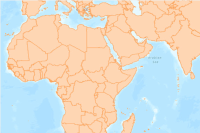

In [76]:
capa = search[2]
capa

In [100]:
mapa.add_layer(capa)

In [73]:
mapa

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [78]:
# Intentar agregar los datos de afectados por riverfloods a los datos de polígonos de los países

print(datos)

     Rank        Country  \
0       1          India   
1       2     Bangladesh   
2       3          China   
3       4        Vietnam   
4       5       Pakistan   
..    ...            ...   
158   159        Jamaica   
159   160       Djibouti   
160   161         Cyprus   
161   162        Iceland   
162   163  Liechtenstein   

    Current annual average population affected by river floods  
0                                            4,835,259          
1                                            3,477,315          
2                                            3,279,455          
3                                              929,635          
4                                              714,822          
..                                                 ...          
158                                                 52          
159                                                 49          
160                                                 42          
161          

In [79]:
print(capa)

<Item title:"World Countries" type:Feature Layer Collection owner:esri_dm>


In [80]:
capa.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">]

In [82]:
capaPaisos = capa.layers[0]
capaPaisos

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">

In [85]:
paisosDf = pd.DataFrame(capaPaisos)

ValueError: DataFrame constructor not properly called!

In [ ]:
layerMap = pd.merge(capa,datos)

# Parte del código que no funciona

No funciona la generación de una variable que almacena la url del servicio de esri_dm y luego trata de pintarla en el mapa

Por lo que parece no coge bien el servicio o no reconoce el campo shape (ni intentando agregar su geometria con el método (set_geomtery)

In [69]:
worldmap = 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/WOR_Boundaries_2022/FeatureServer'

In [70]:
mapa.add_layer(worldmap)

RuntimeError: Cannot infer layer: will not be added to map